In [34]:
import re 
import emoji 
import random 
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')
nltk.download('stopwords')

def extract_emojis(comment):
    return ''.join(c for c in comment if c in emoji.EMOJI_DATA)

def preprocess_comment(comment):
    comment = re.sub(r'http\S+|www.\S+','',comment)
    tokens = word_tokenize(comment.lower())
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(cleaned_tokens)

comments = pd.read_csv("youtube_comments.csv")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
comments.head()

,Author,Comment,Published At,Likes
0,@themooseontheloose,"Go to <a href=""https://ground.news/moose"">http...",2024-10-17T06:28:54Z,103
1,@pradip4581,Treaudu is a disgrace to canada.....,2024-11-20T22:11:19Z,0
2,@Arpit.Vajpayee,Brother... We love is just that I cannot belie...,2024-11-18T15:46:51Z,1
3,@imtweetydiva29,"Kevin O&#39;Leary said in an interview, &quot;...",2024-11-17T14:13:37Z,0
4,@AmbSanma,Trudeau on hot soup,2024-11-16T16:55:03Z,0


In [36]:
only_com = comments.drop(columns= {'Author','Published At', 'Likes'})

In [37]:
only_com.head()

,Comment
0,"Go to <a href=""https://ground.news/moose"">http..."
1,Treaudu is a disgrace to canada.....
2,Brother... We love is just that I cannot belie...
3,"Kevin O&#39;Leary said in an interview, &quot;..."
4,Trudeau on hot soup


In [38]:
only_com.columns

Index(['Comment'], dtype='object')

In [39]:
emoji_list = []
processed_text_list = []
for comment in only_com['Comment']:
    emojis = extract_emojis(comment)
    preprocessed_text = preprocess_comment(comment)
    emoji_list.append(emojis)
    processed_text_list.append(preprocessed_text)
    
only_com['Emojis'] = emoji_list
only_com['Preprocessed_Text'] = processed_text_list



In [40]:
only_com.columns


Index(['Comment', 'Emojis', 'Preprocessed_Text'], dtype='object')

In [41]:
only_com.isnull().sum()

Comment              0
Emojis               0
Preprocessed_Text    0
dtype: int64

In [42]:
import nltk
print(nltk.data.path)  # Check where NLTK looks for its data

# Verify the 'punkt' resource is accessible
from nltk.tokenize import word_tokenize
word_tokenize("Test sentence for verification.")


['C:\\Users\\ASUS/nltk_data', 'e:\\Ashu_Main\\feedback_fusion\\Feedback-Fusion\\minor-feedback-fusion\\nltk_data', 'e:\\Ashu_Main\\feedback_fusion\\Feedback-Fusion\\minor-feedback-fusion\\share\\nltk_data', 'e:\\Ashu_Main\\feedback_fusion\\Feedback-Fusion\\minor-feedback-fusion\\lib\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


['Test', 'sentence', 'for', 'verification', '.']

In [43]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
import nltk
print(nltk.__version__)  # Check if the latest version is installed


3.9.1


In [45]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Sentiment Analysis

In [46]:
from textblob import TextBlob

def analyze_sentiment(comment):
    analysis = TextBlob(comment).sentiment
    return analysis.polarity, analysis.subjectivity

polarity_list = []
subjectivity_list = []
    
for comment in only_com['Preprocessed_Text']:
    polarity, subjectivity = analyze_sentiment(comment)
    polarity_list.append(polarity)
    subjectivity_list.append(subjectivity)
    
only_com['Polarity'] = polarity_list
only_com['Subjectivity'] = subjectivity_list

In [47]:
# Analyze Emojis

from collections import Counter

only_com['emoji_count'] = only_com['Emojis'].apply(lambda x: len(x) if isinstance(x, str) else 0)

def analyze_emojis(only_com):
    emoji_list = []
    for emoji_str in only_com['Emojis']:
        if isinstance(emoji_str, str):
            emoji_list.extend(list(emoji_str))
        
    return dict(Counter(emoji_list))

emoji_analysis = analyze_emojis(only_com)


In [48]:
print(emoji_analysis)

{'😂': 439, '😅': 59, '🔥': 4, '❤': 38, '😎': 8, '❎': 4, '✅': 7, '🤣': 75, '🤝': 5, '🤡': 31, '🗑': 2, '💯': 5, '🍁': 3, '😆': 15, '✌': 7, '🙏': 28, '🕉': 1, '\U0001faaf': 1, '❌': 5, '👍': 26, '👌': 6, '🌈': 2, '😊': 16, '😏': 1, '🦯': 1, '😢': 31, '🎉': 15, '🫠': 2, '😜': 1, '🙁': 1, '🙂': 2, '🃏': 2, '☠': 2, '🏼': 3, '😭': 4, '💀': 1, '💸': 1, '😗': 1, '👿': 1, '👎': 6, '😟': 1, '🤮': 8, '⚠': 6, '🤷': 6, '♂': 9, '🚬': 1, '🗿': 1, '🐖': 1, '🤞': 4, '🫰': 4, '🫶': 2, '🤑': 1, '😃': 1, '🤔': 31, '🌚': 2, '🤥': 1, '🫡': 1, '😮': 22, '♀': 2, '🤓': 1, '☝': 1, '🙊': 1, '🥲': 2, '👶': 1, '💃': 2, '🤬': 7, '👻': 2, '😬': 1, '😵': 1, '💫': 1, '💓': 3, '🤦': 2, '🙋': 1, '🏻': 14, '🍿': 4, '💔': 1, '🏒': 2, '😔': 3, '👏': 17, '💪': 5, '🌎': 4, '🌍': 1, '👀': 1, '🥰': 6, '🐂': 1, '💩': 4, '😹': 3, '😠': 1, '✝': 2, '😘': 1, '🗺': 1, '🙄': 1, '‼': 1, '🧂': 2, '🏴': 1, '👳': 3, '🏽': 1, '🏾': 1, '🙈': 1, '🤨': 1, '🧐': 1, '🤪': 1, '😳': 1, '💨': 2, '🙌': 1, '✊': 1, '☕': 5, '🌴': 1, '😒': 1, '⁉': 1, '🕷': 1, '🧑': 1, '🕸': 1, '💜': 1, '🆘': 1, '😈': 1, '🖕': 2, '😽': 1, '🥳': 1, '🦌': 1, '\U0001face': 

In [49]:
only_com.head()

,Comment,Emojis,Preprocessed_Text,Polarity,Subjectivity,emoji_count
0,"Go to <a href=""https://ground.news/moose"">http...",,go see beyond biased media reporting uncover m...,0.000,0.00,0
1,Treaudu is a disgrace to canada.....,,treaudu disgrace canada,0.000,0.00,0
2,Brother... We love is just that I cannot belie...,,brother love believe canada stand communities ...,0.050,0.62,0
3,"Kevin O&#39;Leary said in an interview, &quot;...",,kevin 39 leary said interview quot trudeau don...,-0.625,1.00,0
4,Trudeau on hot soup,,trudeau hot soup,0.250,0.85,0


In [50]:
only_com.tail()

,Comment,Emojis,Preprocessed_Text,Polarity,Subjectivity,emoji_count
2163,I hate to see what’s become of Canada.. I hate...,,hate see become canada hate even lie say want ...,-0.8,0.9,0
2164,☕️,☕,,0.0,0.0,1
2165,Morning David,,morning david,0.0,0.0,0
2166,Morning all,,morning,0.0,0.0,0
2167,"Go to <a href=""https://ground.news/moose"">http...",,go see beyond biased media reporting uncover m...,0.0,0.0,0


## Visualization 

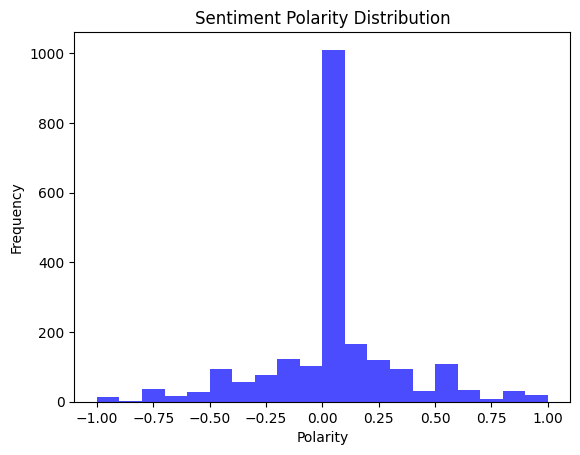

In [51]:
import matplotlib.pyplot as plt 

def visualize_sentiments(only_com):
    polarities = only_com['Polarity']
    plt.hist(polarities,bins = 20, color = 'blue', alpha = 0.7)
    plt.title('Sentiment Polarity Distribution')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.show()
    
visualize_sentiments(only_com)

e:\Ashu_Main\feedback_fusion\Feedback-Fusion\minor-feedback-fusion\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129310 (\N{HAND WITH INDEX AND MIDDLE FINGERS CROSSED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Ashu_Main\feedback_fusion\Feedback-Fusion\minor-feedback-fusion\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129776 (\N{HAND WITH INDEX FINGER AND THUMB CROSSED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Ashu_Main\feedback_fusion\Feedback-Fusion\minor-feedback-fusion\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Ashu_Main\feedback_fusion\Feedback-Fusion\minor-feedback-fusion\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

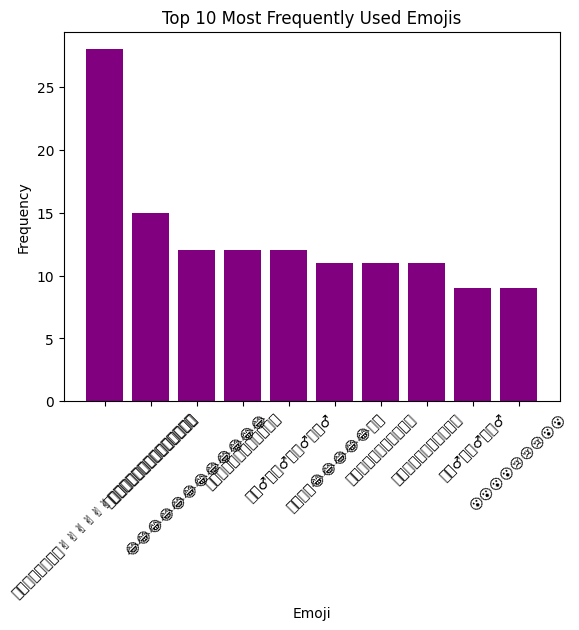

In [54]:
def visualize_emojis(only_com):
    
    top_emojis = only_com.sort_values(by = 'emoji_count', ascending=False).head(10)
    plt.bar(top_emojis['Emojis'], top_emojis['emoji_count'], color = 'purple')
    plt.xlabel('Emoji')
    plt.ylabel('Frequency')
    plt.title('Top 10 Most Frequently Used Emojis')
    plt.xticks(rotation=45)
    plt.show()
    
visualize_emojis(only_com)

In [ ]:
import streamlit as st

st.title("YouTube Comments Analysis")
st.header("Sentiment Analysis Results")

# Display Sentiments
if 'Polarity' in only_com.columns:
    st.bar_chart(only_com['Polarity'])
else:
    st.write("Polarity data not available.")

# Display Emoji Frequencies
st.header("Top Emoji Usage")

if 'Emojis' in only_com.columns and 'emoji_count' in only_com.columns:
    top_emojis = only_com[['Emojis', 'emoji_count']].sort_values(by='emoji_count', ascending=False).head(10)
    st.bar_chart(top_emojis.set_index('Emojis'))
else:
    st.write("Emoji data not available.")

2024-11-22 12:34:15.107 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 12:34:15.296 
  command:

    streamlit run e:\Ashu_Main\feedback_fusion\Feedback-Fusion\minor-feedback-fusion\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-22 12:34:15.298 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 12:34:15.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 12:34:15.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 12:34:22.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 12:34:22.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-

NameError: name 'emoji_counts' is not defined